In [1]:
#TODO MLS ILS GLS time give 
#GLS hamming distance 
# statistics 
# 3. Implement and test GLS (using the FM local search) with population size 50. The
# specific genetic algorithm is an incremental (or steady state) GA where there is no
# explicit notion of generations: each iteration two parents are randomly selected, use
# uniform crossover to generate one child, do FM local search on the child, let this
# optimized child compete with the worst solution in the population, if it is better or
# equal it replaces the worst solution. Are the GLS results statistically better/worse
# than MLS or ILS ?

In [1]:
import time
import pickle
import statistics
import random
import matplotlib.pyplot as plt

from gls import GLS  

In [3]:
NUM_RUNS = 1
POP_SIZE = 50
MAX_ITERATIONS = 10000   # 10_000 iterations
random_seeds = list(range(NUM_RUNS))  # or pick any 10 distinct seeds

In [4]:
gls_cut_sizes = []
gls_times = []

for i in range(NUM_RUNS):
    seed = random_seeds[i]
    print(f"Starting GLS run {i+1}/{NUM_RUNS} with seed={seed}")

    start_time = time.time()

    # GLS 
    gls = GLS(
        graph_filename="Graph500.txt",
        pop_size=POP_SIZE,
        max_iterations=MAX_ITERATIONS,
        random_seed=seed
    )

    best_cut_size = gls.run_gls()  

    end_time = time.time()
    elapsed = end_time - start_time

    # Record results
    gls_cut_sizes.append(best_cut_size)
    gls_times.append(elapsed)

    print(f"Run {i+1} done. Best cut size = {best_cut_size}, Time = {elapsed:.2f}s")
    
gls_results_dict = {
    "cut_sizes": gls_cut_sizes,
    "run_times": gls_times,
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")  # readable timestamp inside the file
}

timestamp = time.strftime("%Y%m%d-%H%M%S")
solution_filename = f"pckl/{timestamp}_GLS-pop_size_{POP_SIZE}-iter_{MAX_ITERATIONS}.pkl"


with open(solution_filename, "wb") as f:
    pickle.dump(gls_results_dict, f)

print(f"GLS results have been pickled to '{solution_filename}'.")


Starting GLS run 1/1 with seed=0
Run 1 done. Best cut size = 9, Time = 437.17s
GLS results have been pickled to 'pckl/20250331-173550_GLS-pop_size_50-iter_10000.pkl'.


In [10]:
print("\n===== GLS (10 runs) Summary =====")
print("Cut sizes:", gls_cut_sizes)
print(f"Best cut size across 10 runs: {min(gls_cut_sizes)}")
print(f"Median cut size across 10 runs: {statistics.median(gls_cut_sizes)}")
print(f"Mean cut size across 10 runs: {statistics.mean(gls_cut_sizes):.2f}, Std Dev: {statistics.pstdev(gls_cut_sizes):.2f}")
print(f"Avg run time: {statistics.mean(gls_times):.2f}s  (Std Dev: {statistics.pstdev(gls_times):.2f}s)")


===== GLS (10 runs) Summary =====
Cut sizes: [9, 6, 7, 12, 7, 8, 8, 12, 7, 8]
Best cut size across 10 runs: 6
Median cut size across 10 runs: 8.0
Mean cut size across 10 runs: 8.40, Std Dev: 1.96
Avg run time: 89.82s  (Std Dev: 3.10s)


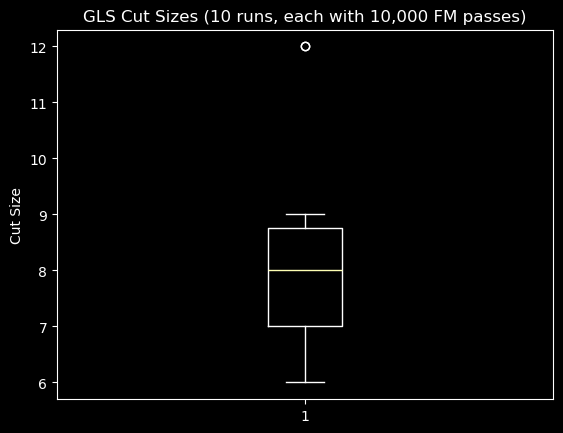

In [11]:
plt.boxplot(gls_cut_sizes)
plt.title("GLS Cut Sizes (10 runs, each with 10,000 FM passes)")
plt.ylabel("Cut Size")
plt.show()

In [13]:
gls_results_dict = {
    "cut_sizes": gls_cut_sizes,
    "run_times": gls_times,
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")  # readable timestamp inside the file
}


timestamp = time.strftime("%Y%m%d-%H%M%S")
solution_filename = f"pckl/gls_results__with_pop_size{POP_SIZE}_with_iter_{MAX_ITERATIONS}_seed{random_seeds}_{timestamp}.pkl"


with open(solution_filename, "wb") as f:
    pickle.dump(gls_results_dict, f)

print(f"GLS results have been pickled to '{solution_filename}'.")


GLS results have been pickled to 'pckl/gls_results__with_pop_size50_with_iter_1000_seed[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]_20250328-164250.pkl'.
